In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:


# Replace 'file_path.csv' with the path to your CSV file
file_path = 'PersonalFinance.csv'

# Use pandas' read_csv function to read the CSV file into a DataFrame
df = pd.read_csv(file_path)



In [3]:
print(df.head())


   Customer ID  Gender  Age  Annual Income(k$)  Spending Score (1-100)
0            1    MALE   19                 15                      39
1            2    MALE   21                 15                      81
2            3  FEMALE   20                 16                       6
3            4  FEMALE   23                 16                      77
4            5  FEMALE   31                 17                     400


In [4]:
print(df.shape)

(5, 5)


In [5]:
df["Customer ID"]

0    1
1    2
2    3
3    4
4    5
Name: Customer ID, dtype: int64

In [6]:
df["Gender"]

0      MALE
1      MALE
2    FEMALE
3    FEMALE
4    FEMALE
Name: Gender, dtype: object

In [7]:
df["Age"]

0    19
1    21
2    20
3    23
4    31
Name: Age, dtype: int64

In [8]:
df["Annual Income(k$)"]

0    15
1    15
2    16
3    16
4    17
Name: Annual Income(k$), dtype: int64

In [9]:
df.rename(columns={ 'Spending Score (1-100)': 'Exact Scores'})

,Customer ID,Gender,Age,Annual Income(k$),Exact Scores
0,1,MALE,19,15,39
1,2,MALE,21,15,81
2,3,FEMALE,20,16,6
3,4,FEMALE,23,16,77
4,5,FEMALE,31,17,400


In [10]:
df.rename(columns={ 'Annual Income(k$)': 'Annual Income'})


,Customer ID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,MALE,19,15,39
1,2,MALE,21,15,81
2,3,FEMALE,20,16,6
3,4,FEMALE,23,16,77
4,5,FEMALE,31,17,400


In [11]:
y=df['Spending Score (1-100)']
y

0     39
1     81
2      6
3     77
4    400
Name: Spending Score (1-100), dtype: int64

In [12]:
y=df['Spending Score (1-100)']
x=df.drop(columns=['Spending Score (1-100)'])
y
x

,Customer ID,Gender,Age,Annual Income(k$)
0,1,MALE,19,15
1,2,MALE,21,15
2,3,FEMALE,20,16
3,4,FEMALE,23,16
4,5,FEMALE,31,17


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#print the shaps of the resulting datasets to verity the split
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (4, 4)
x_test shape: (1, 4)
y_train shape: (4,)
y_test shape: (1,)


In [15]:
x_train

,Customer ID,Gender,Age,Annual Income(k$)
2,3,FEMALE,20,16
0,1,MALE,19,15
4,5,FEMALE,31,17
1,2,MALE,21,15


In [16]:
x_test

,Customer ID,Gender,Age,Annual Income(k$)
3,4,FEMALE,23,16


In [17]:
y_train

2      6
0     39
4    400
1     81
Name: Spending Score (1-100), dtype: int64

In [18]:
y_test

3    77
Name: Spending Score (1-100), dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'GENDER' column in the training data
x_train['Gender'] = label_encoder.fit_transform(x_train['Gender'])

# Transform the 'GENDER' column in the test data (assuming it's already fit on the training data)
x_test['Gender'] = label_encoder.transform(x_test['Gender'])

# Print the modified dataframes
print(x_train)
print(x_test)

   Customer ID  Gender  Age  Annual Income(k$)
2            3       0   20                 16
0            1       1   19                 15
4            5       0   31                 17
1            2       1   21                 15
   Customer ID  Gender  Age  Annual Income(k$)
3            4       0   23                 16


In [20]:
# prompt: support vector machine regressor fitting data

from sklearn.svm import SVR

# Instantiate the SVR model
svm_model = SVR(kernel='linear')

# Fit the model on the training data
svm_model.fit(x_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(x_test)

# Print the predicted values
print(y_pred)

[107.5]


In [21]:
from sklearn.metrics import mean_absolute_error

svm_mae = mean_absolute_error(y_test, y_pred)

print("Mean absolute error:", svm_mae)

Mean absolute error: 30.5


In [22]:
81-64.83126646

16.168733540000005

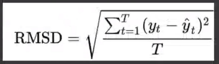

In [23]:
# promt: svm mean absolute error

from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate mean absolute error
#svm_mea = mean_absolute_error(y_test, svm_prediction)
Mean_sqrd_error=mean_squared_error(y_test, y_pred)
RMSE=sqrt(Mean_sqrd_error)

#print the mean absolute error
print("Root Mean Squard Error:",RMSE)

Root Mean Squard Error: 30.5


In [24]:
Details = {'Customer ID': [50], 'Gender':[1], 'Age':[75], 'Annual Income(k$)':[500]}
perFinNew=pd.DataFrame.from_dict(Details)
perFinNew
svm_prediction1 = svm_model.predict(perFinNew)
print(svm_prediction1)


[1405.5]


In [25]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
dt_prediction = dt_model.predict(x_test)
dt_mae = mean_absolute_error(y_test,dt_prediction)
print(dt_prediction)
print(dt_mae)
Mean_Sqrd_Error_dt=mean_squared_error(y_test, dt_prediction)
RMSE = sqrt(Mean_Sqrd_Error_dt)
print(RMSE)

[81.]
4.0
4.0


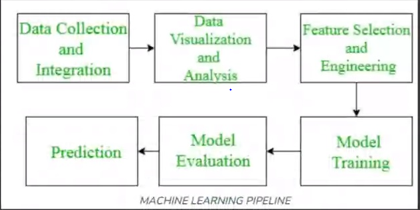

In [26]:
!curl -s -xpost "http ://jibinvargees"

In [27]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

scaled_x_train = pd.DataFrame(std_scaler.fit_transform(x_train),columns =x_train.columns,index =x_train.index)
scaled_x_train

,Customer ID,Gender,Age,Annual Income(k$)
2,0.169031,-1.0,-0.571092,0.301511
0,-1.183216,1.0,-0.778761,-0.904534
4,1.521278,-1.0,1.713275,1.507557
1,-0.507093,1.0,-0.363422,-0.904534


In [28]:
from sklearn.preprocessing import StandardScaler
scaled_x_test = pd.DataFrame(std_scaler.fit_transform(x_test),columns =x_test.columns,index =x_test.index)
scaled_x_test

,Customer ID,Gender,Age,Annual Income(k$)
3,0.0,0.0,0.0,0.0
